In [1]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
price_df = pd.read_csv('price_data.csv', index_col = 'Date', parse_dates = ['Date'])
price_df.head()

,加權指數,報酬指數,台泥,亞泥,統一,台塑,南亞,台化,遠東新,中鋼,...,日月光投控,遠傳,和碩,中租-KY,上海商銀,合庫金,矽力-KY,台塑化,緯穎,豐泰
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-01,10600.37,18161.64,23.06,23.03,55.91,79.43,63.95,79.86,22.04,22.09,...,NaN,61.79,57.10,71.38,NaN,13.38,623.57,95.18,NaN,90.20
2017-12-04,10651.11,18248.57,23.23,22.98,54.69,79.86,64.46,80.45,22.38,22.32,...,NaN,61.62,56.19,71.55,NaN,13.46,607.86,96.50,NaN,91.95
2017-12-05,10566.85,18104.22,23.23,22.90,55.65,80.12,64.63,81.13,22.30,22.27,...,NaN,61.28,57.59,71.05,NaN,13.46,600.01,97.82,NaN,93.00
2017-12-06,10393.92,17807.92,23.13,22.98,56.26,79.61,63.95,80.88,22.17,22.14,...,NaN,61.19,58.34,69.16,NaN,13.42,589.20,96.06,NaN,93.35
2017-12-07,10355.76,17742.55,23.20,22.73,56.26,79.61,63.52,79.69,21.82,22.09,...,NaN,61.28,58.01,69.16,NaN,13.38,601.97,95.62,NaN,93.00


In [3]:
return_df = price_df.pct_change()
final_output = {}
alpha_list = []
beta_list = []
ERI = []
 
for company in return_df.columns[2:]:
 
    data_df = pd.concat([return_df[company], return_df['報酬指數']], axis=1).dropna(axis=0)
    data_df.columns = [company, 'index']
 
    X = data_df[['index']].assign(Intercept=1)
    Y = data_df[company]
    X1 = sm.add_constant(X)
 
    model = sm.OLS(Y, X1)
    results = model.fit()
 
    alpha = pd.read_html(results.summary().as_html(), header=0, index_col=0)[1].iloc[1][0]
    beta = pd.read_html(results.summary().as_html(), header=0, index_col=0)[1].iloc[0][0]
    ERi = (alpha + beta*return_df['報酬指數'].mean())*252
 
    final_output[company] = [alpha, beta, ERi]
    alpha_list.append(alpha)
    beta_list.append(beta)
    ERI.append(ERi)

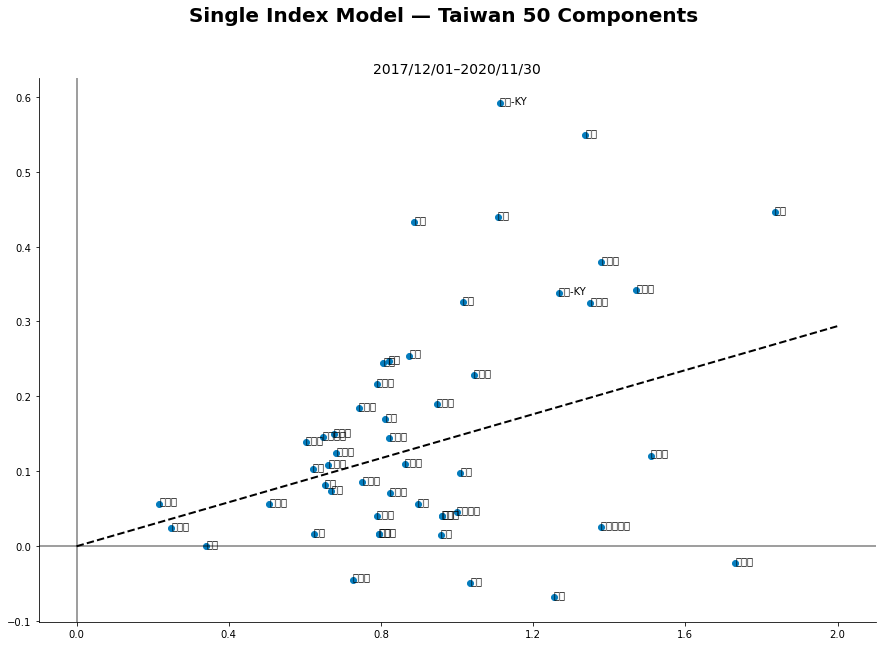

In [9]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
 
# font_pro = FontProperties(fname='C:\\Windows\\Fonts\\mingliu.ttc')
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Single Index Model — Taiwan 50 Components', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.88)
ax.set_title('2017/12/01–2020/11/30', fontsize=14)
ax.scatter(beta_list, ERI, c = '#047cbd')
 
for k, v in final_output.items():
    ax.annotate(k, (float(v[1]), float(v[-1])))
 
 
ax.axhline(y=0, color='k', ls='-', alpha = 0.5)
ax.axvline(x=0, color='k', ls='-', alpha = 0.5)
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
x1, x2 = 0, 2
y1, y2 = 0, return_df['報酬指數'].mean()*252*2
 
plt.xticks(np.arange(-0.4, 2.1, 0.4))
plt.plot([x1, x2], [y1, y2], 'k--', linewidth=2)
plt.show()